# Reading MDA files

In [7]:
import pyms.mlpy as mlpy
import numpy as np

In [8]:
mda_dir = '/media/trevortknguyen/a8a15e97-b12c-4825-8482-0be8f89aac96/20170920_remy_02_r1/20170920_remy_02_r1.mda'
file_prefix = '20170920_remy_02_r1'

In [9]:
def get_tetrode_file(mda_dir, file_prefix, ntrodeid):
    file_path = f'{mda_dir}/{file_prefix}.nt{str(ntrodeid)}.mda'
    return file_path

def read_mda_file(mda_dir, filename):
    file_path = f'{mda_dir}/{filename}'
    return mlpy.readmda(file_path)

In [10]:
fname = get_tetrode_file(mda_dir, file_prefix, 1)

In [11]:
files = []

for i in range(5):
    fname = get_tetrode_file(mda_dir, file_prefix, i+1)
    neural_data = mlpy.readmda(fname)
    files.append(neural_data)

In [12]:
total_channels = 0
total_timestamps = None

for file in files:
    total_channels += file.shape[0]
    
    if total_timestamps == None:
        total_timestamps = file.shape[1]
    else:
        assert total_timestamps == file.shape[1]

In [13]:
total_channels

18

Operations:
- create an ndarray (times, channels)
- do a for loop with an incrementing index
- load in the transposed data one by one

In [10]:
combined = np.empty((total_timestamps, total_channels), dtype='int16')

In [11]:
idx = 0

for file in files:
    combined[:, idx:idx+file.shape[0]] = file.T
    idx += file.shape[0]

In [12]:
combined[:10]

array([[-495, -849, -577, -559,   99,  -12,  464,  561,  721,  697,  941,
        1022, 1087,  559,    0, -141, -195, -211],
       [-476, -823, -572, -539,   63,  -79,  428,  563,  705,  667,  944,
         971, 1051,  564,    0, -117, -161, -186],
       [-492, -871, -629, -592,   96, -101,  344,  481,  698,  570,  908,
         936,  983,  512,    0, -106, -170, -131],
       [-532, -969, -672, -663,   49,  -84,  297,  374,  620,  535,  896,
         879,  999,  462,    0, -133, -177, -144],
       [-479, -898, -581, -560,  100,   50,  354,  420,  641,  641,  955,
         931, 1111,  478,    0, -127, -205, -169],
       [-527, -935, -614, -582,  138,  -34,  339,  445,  650,  556,  973,
         994,  992,  416,    0, -129, -163, -108],
       [-516, -947, -595, -599,  194,   13,  381,  432,  637,  570,  977,
         961,  931,  334,    0, -105, -149,  -83],
       [-536, -937, -629, -588,  142,   57,  349,  416,  678,  568,  993,
         954, 1018,  431,    0, -107, -161,  -94],


In [13]:
import matplotlib.pyplot as plt

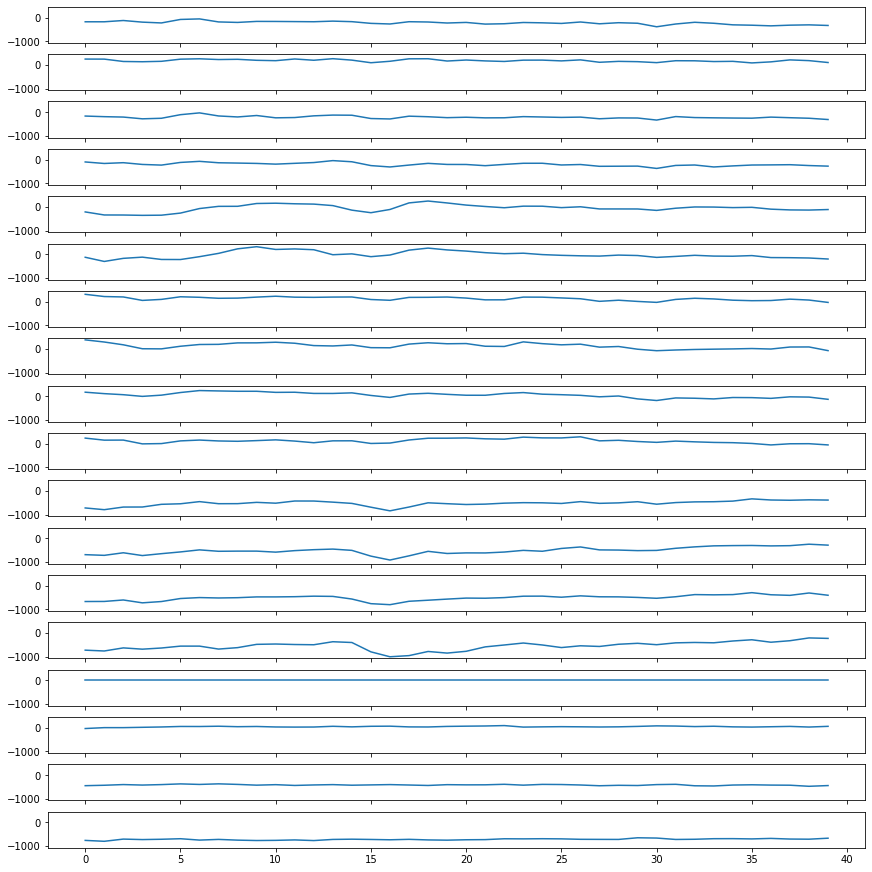

In [14]:
fig, axes = plt.subplots(combined.shape[1], 1, figsize=(12, 12), constrained_layout=True, sharex=True, sharey=True)

point = 250000
limit = 40

for i in range(total_channels):
    axes[i].plot(combined[point:point+limit, i])

In [16]:
fft_result = np.fft.fft(combined[:2000], axis=1)

In [17]:
fft_result.shape

(2000, 18)

In [18]:
fft_result.dtype

dtype('complex128')

In [20]:
fft_result[:,1]

array([-6757.17236092+2201.6849427j , -6518.10526958+2302.23774159j,
       -6277.47201693+2395.85119898j, ...,  3771.75291491-5531.54228183j,
        3778.14915822-5144.63052787j,  3850.55122313-4915.61818522j])

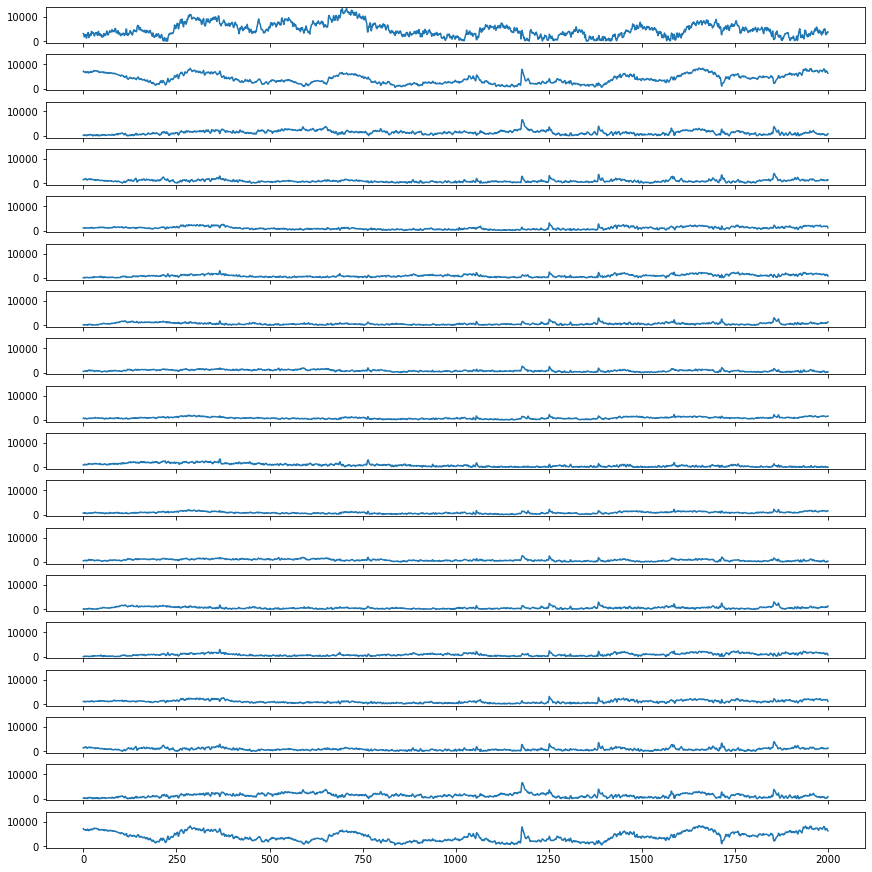

In [22]:
fig, axes = plt.subplots(combined.shape[1], 1, figsize=(12, 12), constrained_layout=True, sharex=True, sharey=True)

for i in range(total_channels):
    axes[i].plot(np.abs(fft_result[:, i]))

What's my actual goal right now. To determine the spikes at a certain time?

In [23]:
import neural_dimensionality_reduction as ndr
import numpy as np

In [24]:
spikes, _ = ndr.get_spikes_data(ndr.data_dir)

/nix/store/0m459gzwib59dgahny5wrpwk0v1g17sq-python3-3.7.6-env/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3254: DtypeWarning: Columns (11,12,13,15) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


Get the actual timestamps of these.

In [25]:
adj_ts = read_mda_file(mda_dir, '20170920_remy_02_r1.timestamps.adj.mda')

In [27]:
adj_ts.shape

(1, 36975610)

In [28]:
ts = read_mda_file(mda_dir, '20170920_remy_02_r1.timestamps.mda')

In [29]:
ts.shape

(36975610,)

In [30]:
adj_ts[0,:10]

array([48676146, 48676147, 48676148, 48676149, 48676150, 48676151,
       48676152, 48676153, 48676154, 48676155], dtype=uint32)

In [31]:
ts[:10]

array([122431037, 122431038, 122431039, 122431040, 122431041, 122431042,
       122431043, 122431044, 122431045, 122431046], dtype=uint32)

In [34]:
import os
import pandas as pd
import netCDF4 as nc

data_dir = os.environ['DATA_DIR']
marks_fn = f'{data_dir}/remy_35_02_marks.nc'
position_fn = f'{data_dir}/remy_35_02_position_info.csv'

In [35]:
ds = nc.Dataset(marks_fn)
df = pd.read_csv(position_fn)

/nix/store/0m459gzwib59dgahny5wrpwk0v1g17sq-python3-3.7.6-env/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (11,12,13,15) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [47]:
df

,time,x_position,y_position,head_direction,speed,linear_distance,projected_x_position,projected_y_position,track_segment_id,arm_name,labeled_segments,from_well,to_well,task,is_correct,turn,linear_position,linear_velocity,linear_speed
0,00:27:03.358200,108.276000,99.036000,NaN,1.115499e-13,49.825283,123.319488,98.788543,0.0,Center Arm,1,NaN,NaN,NaN,False,NaN,49.825283,NaN,NaN
1,00:27:03.360200,108.276000,99.036000,NaN,1.089383e-13,49.825283,123.319488,98.788543,0.0,Center Arm,1,NaN,NaN,NaN,False,NaN,49.825283,NaN,NaN
2,00:27:03.362200,108.276000,99.036000,NaN,1.063267e-13,49.825283,123.319488,98.788543,0.0,Center Arm,1,NaN,NaN,NaN,False,NaN,49.825283,NaN,NaN
3,00:27:03.364200,108.276000,99.036000,NaN,1.037150e-13,49.825283,123.319488,98.788543,0.0,Center Arm,1,NaN,NaN,NaN,False,NaN,49.825283,NaN,NaN
4,00:27:03.366200,108.276000,99.036000,NaN,1.011034e-13,49.825283,123.319488,98.788543,0.0,Center Arm,1,NaN,NaN,NaN,False,NaN,49.825283,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
615846,00:47:35.050200,122.525189,48.517662,-1.420448,1.624166e+00,0.000000,122.500000,48.970000,0.0,Center Arm,0,NaN,NaN,NaN,False,NaN,0.000000,-0.389730,0.389730
615847,00:47:35.052200,122.525189,48.517662,-1.420448,1.624166e+00,0.000000,122.500000,48.970000,0.0,Center Arm,0,NaN,NaN,NaN,False,NaN,0.000000,-0.311785,0.311785
615848,00:47:35.054200,122.525189,48.517662,-1.420448,1.624166e+00,0.000000,122.500000,48.970000,0.0,Center Arm,0,NaN,NaN,NaN,False,NaN,0.000000,-0.233840,0.233840
615849,00:47:35.056200,122.525189,48.517662,-1.420448,1.624166e+00,0.000000,122.500000,48.970000,0.0,Center Arm,0,NaN,NaN,NaN,False,NaN,0.000000,-0.155894,0.155894


I don't know how to generate clips for this. Hmm.

## Something separate (Oct 22, 2020)

In [14]:
fname = get_tetrode_file(mda_dir, file_prefix, 1)

In [15]:
neural_data = mlpy.readmda(fname)

In [18]:
neural_data.T.shape

(36975610, 4)